### Face Recognition using Labeled Faces in the Wild

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
BASE = 'data/lfiw/'

In [4]:
ls {BASE}

lfw-10/  lfw-5/             lfw-deepfunneled.tgz  README.txt
lfw-20/  lfw-deepfunneled/  lfw-names.txt.txt


In [5]:
PATH = 'data/lfiw/lfw-10/'

In [6]:
files = !ls {PATH}train/Serena_Williams 
files

['Serena_Williams_0001.jpg',
 'Serena_Williams_0002.jpg',
 'Serena_Williams_0003.jpg',
 'Serena_Williams_0004.jpg',
 'Serena_Williams_0005.jpg',
 'Serena_Williams_0006.jpg',
 'Serena_Williams_0007.jpg']

In [7]:
files = !ls {PATH}valid/Serena_Williams | head
files

['Serena_Williams_0008.jpg',
 'Serena_Williams_0009.jpg',
 'Serena_Williams_0010.jpg']

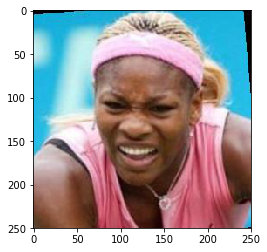

In [8]:
img = plt.imread(f'{PATH}valid/Serena_Williams/{files[0]}')
plt.imshow(img);

In [9]:
# Uncomment the below if you need to reset your precomputed activations
#!rm -rf {PATH}tmp

In [10]:
sz =224
#arch=resnet152
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 10)

A Jupyter Widget

[ 0.       5.11254  4.51517  0.06731]                     
[ 1.       4.03998  4.09586  0.15129]                     
[ 2.       3.20027  3.99416  0.15805]                     
[ 3.       2.53579  4.0358   0.16496]                    
[ 4.       1.98559  4.10672  0.18735]                     
[ 5.       1.57857  4.25653  0.18059]                     
[ 6.       1.2602   4.42885  0.18059]                     
[ 7.       1.04232  4.5251   0.15805]                    
[ 8.       0.85403  4.60091  0.19035]                     
[ 9.       0.70017  4.65663  0.19621]                      



In [11]:
# This is the label for a val data
data.val_y

array([  0,   0,   0,   1,   1,   1,   2,   2,   2,   3,   3,   3,   4,   4,   4,   5,   5,   5,   6,   6,
         6,   7,   7,   7,   8,   8,   8,   9,   9,   9,  10,  10,  10,  11,  11,  11,  12,  12,  12,  13,
        13,  13,  14,  14,  14,  15,  15,  15,  16,  16,  16,  17,  17,  17,  18,  18,  18,  19,  19,  19,
        20,  20,  20,  21,  21,  21,  22,  22,  22,  23,  23,  23,  24,  24,  24,  25,  25,  25,  26,  26,
        26,  27,  27,  27,  28,  28,  28,  29,  29,  29,  30,  30,  30,  31,  31,  31,  32,  32,  32,  33,
        33,  33,  34,  34,  34,  35,  35,  35,  36,  36,  36,  37,  37,  37,  38,  38,  38,  39,  39,  39,
        40,  40,  40,  41,  41,  41,  42,  42,  42,  43,  43,  43,  44,  44,  44,  45,  45,  45,  46,  46,
        46,  47,  47,  47,  48,  48,  48,  49,  49,  49,  50,  50,  50,  51,  51,  51,  52,  52,  52,  53,
        53,  53,  54,  54,  54,  55,  55,  55,  56,  56,  56,  57,  57,  57,  58,  58,  58,  59,  59,  59,
        60,  60,  60,  61,  61,  61, 

In [12]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['Abdullah_Gul',
 'Adrien_Brody',
 'Alejandro_Toledo',
 'Alvaro_Uribe',
 'Amelie_Mauresmo',
 'Andre_Agassi',
 'Andy_Roddick',
 'Angelina_Jolie',
 'Ann_Veneman',
 'Anna_Kournikova',
 'Ari_Fleischer',
 'Ariel_Sharon',
 'Arnold_Schwarzenegger',
 'Atal_Bihari_Vajpayee',
 'Bill_Clinton',
 'Bill_Gates',
 'Bill_McBride',
 'Bill_Simon',
 'Britney_Spears',
 'Carlos_Menem',
 'Carlos_Moya',
 'Catherine_Zeta-Jones',
 'Charles_Moose',
 'Colin_Powell',
 'Condoleezza_Rice',
 'David_Beckham',
 'David_Nalbandian',
 'Dick_Cheney',
 'Dominique_de_Villepin',
 'Donald_Rumsfeld',
 'Edmund_Stoiber',
 'Eduardo_Duhalde',
 'Fidel_Castro',
 'George_HW_Bush',
 'George_Robertson',
 'George_W_Bush',
 'Gerhard_Schroeder',
 'Gloria_Macapagal_Arroyo',
 'Gonzalo_Sanchez_de_Lozada',
 'Gordon_Brown',
 'Gray_Davis',
 'Guillermo_Coria',
 'Halle_Berry',
 'Hamid_Karzai',
 'Hans_Blix',
 'Harrison_Ford',
 'Hillary_Clinton',
 'Howard_Dean',
 'Hu_Jintao',
 'Hugo_Chavez',
 'Ian_Thorpe',
 'Igor_Ivanov',
 'Jack_Straw',
 'Jackie_Cha

In [13]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(474, 158)

In [14]:
log_preds[:2]

array([[ -3.92172,  -5.01658,  -6.60566, -10.00981, -10.36686,  -8.71987, -11.99851, -11.30634, -13.98487,
        -16.33149,  -9.71974,  -8.85693,  -6.65644,  -4.84823, -13.21594,  -7.3991 ,  -8.2579 ,  -1.81509,
        -11.36237, -12.03895, -13.10633,  -9.65227, -11.26684,  -8.86395, -11.74302, -11.42818, -14.38342,
        -11.92987,  -5.18751, -10.32326,  -8.87751,  -8.88407, -14.37908, -11.23048,  -5.4128 , -10.34853,
         -9.28777, -15.41108,  -4.83084, -10.47149,  -7.40819, -11.43828, -11.50561, -12.54598,  -8.78828,
         -7.58179, -11.09252,  -6.43781,  -9.08268,  -3.54377, -13.16486,  -4.76557,  -8.3741 , -10.77384,
        -11.38111,  -8.50037, -13.96317, -14.29815, -10.40867, -10.83565,  -8.50094,  -6.22778, -14.80982,
         -4.93467, -11.87629,  -9.65186, -12.24192, -12.18215,  -7.00388,  -6.75408, -11.70405,  -6.28979,
         -8.18909,  -7.69063,  -4.69333, -12.67974, -10.27305, -14.33271,  -9.18724, -13.94134,  -8.26555,
         -9.44731, -13.57588, -11.312

In [15]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [16]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [17]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [18]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [19]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

Correctly classified


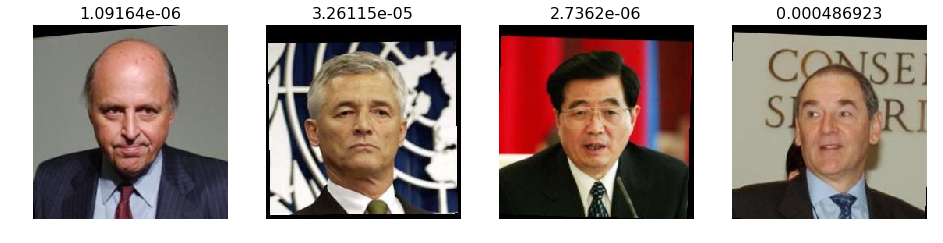

In [20]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


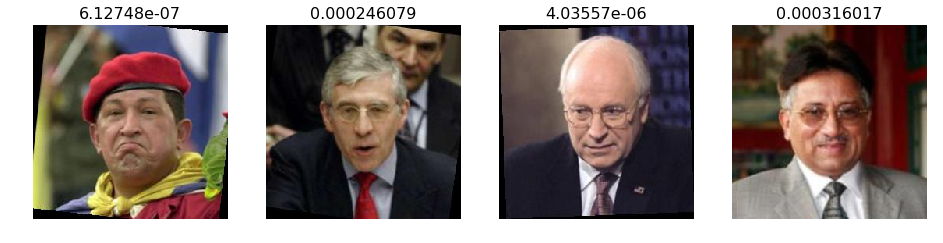

In [21]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [22]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct Alejandro_Toledo


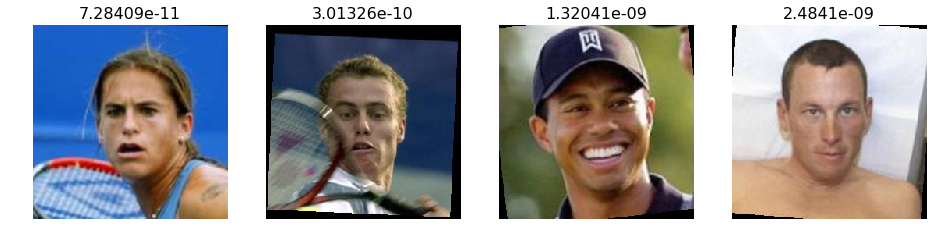

In [23]:
#Mistake! Correct this 
plot_val_with_title(most_by_correct(0, True), "Most correct Alejandro_Toledo") # 0 ->  Alejandro_Toledo

Most correct Alejandro_Toledo


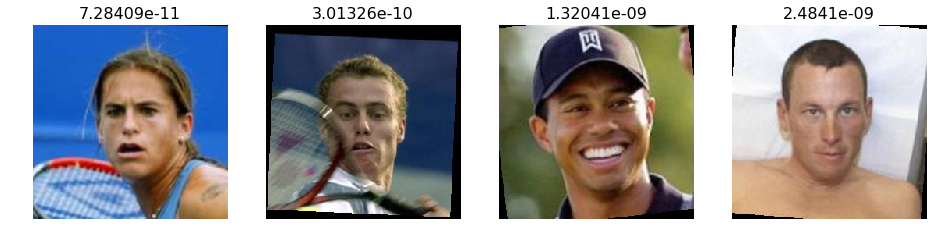

In [24]:
plot_val_with_title(most_by_correct(15, True), "Most correct Alejandro_Toledo") # 0 ->  Alejandro_Toledo

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [26]:
lrf=learn.lr_find()

A Jupyter Widget

[  0.        5.51672  57.9931    0.02344]                



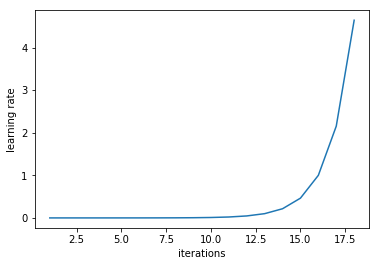

In [27]:
learn.sched.plot_lr()

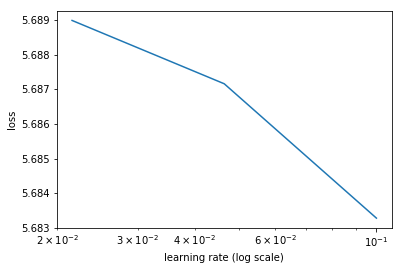

In [28]:
learn.sched.plot()

In [29]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [30]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [31]:
ims = np.stack([get_augs() for i in range(6)])

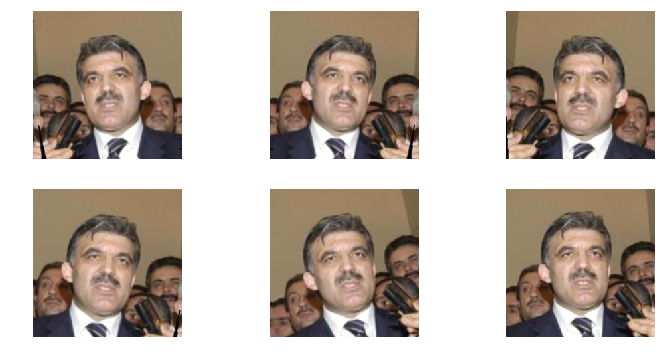

In [32]:
plots(ims, rows=2)

In [33]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True,ps=0.5)

In [34]:
learn.fit(1e-2, 1)

A Jupyter Widget

[ 0.       5.68641  5.02483  0.00781]                    



In [35]:
learn.precompute=False

In [36]:
%time learn.fit(1e-1, 10, cycle_len=1)

A Jupyter Widget

[ 0.       5.17092  4.57846  0.06235]                     
[ 1.       4.6185   4.19455  0.11313]                     
[ 2.       4.14612  4.06032  0.11508]                     
[ 3.       3.74235  3.92112  0.14543]                     
[ 4.       3.42277  3.84243  0.16481]                     
[ 5.       3.13337  3.80718  0.17548]                     
[ 6.       2.84966  3.75693  0.17563]                     
[ 7.       2.63407  3.73292  0.1854 ]                     
[ 8.       2.45129  3.8207   0.19411]                     
[ 9.       2.24976  3.75526  0.18435]                     

CPU times: user 3min 10s, sys: 22.6 s, total: 3min 33s
Wall time: 2min 33s


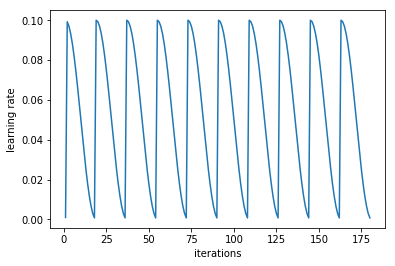

In [37]:
learn.sched.plot_lr()

In [38]:
learn.unfreeze()

In [39]:
#learn.freeze_to(1)
lr=np.array([1e-3,2e-2,3e-1])

In [40]:
%time learn.fit(lr, 7, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       3.64501  4.32656  0.12981]                     
[ 1.       3.63673  4.45337  0.14934]                     
[ 2.       3.18721  3.00628  0.26623]                     
[ 3.       2.83772  4.15111  0.17849]                     
[ 4.       2.50681  2.96193  0.33939]                     
[ 5.       2.04298  2.3374   0.44486]                     
[ 6.       1.58507  2.1712   0.46124]                     
[ 7.       1.40345  3.71489  0.31581]                     
[ 8.       1.47976  3.92714  0.30138]                     
[ 9.       1.45767  3.27396  0.35472]                     
[ 10.        1.35249   2.70812   0.41827]                 
[ 11.        1.16611   2.1667    0.48678]                 
[ 12.        0.95147   2.00916   0.53636]                  
[ 13.        0.73972   1.92579   0.56656]                  
[ 14.        0.5919    1.89015   0.56851]                  
[ 15.        0.54192   2.99386   0.42803]                  
[ 16.        0.62826   3.94498   0.33428]           

In [41]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)

0.71518987341772156

In [42]:
learn.save(f'{sz}')

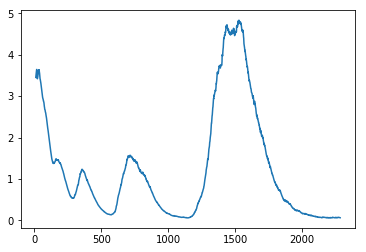

In [43]:
learn.sched.plot_loss()

In [44]:
sz=128

In [45]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

NameError: name 'get_data' is not defined

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
sz=256

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
tta = learn.TTA()

In [ ]:
f2(*tta)

### End

## New heading

# New heading